In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

### Hamming Distance Region

In [2]:
def HammingD(rowLabel, colLabel):
    HammingD = 0
    rowLabel = str(rowLabel)
    colLabel = str(colLabel)
    
    if len(rowLabel) != len(colLabel):
        return np.nan
        
    for i in range(len(rowLabel)):
        if rowLabel[i] != colLabel[i]:
            HammingD += 1
    return HammingD

In [3]:
nQubit  = 4
rowLabel = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', 
            '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
colLabel = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', 
            '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']

HammingMap = np.ones((len(rowLabel),len(colLabel))) * 0
for i in range(len(rowLabel)):
    for j in range(len(colLabel)):
        HammingMap[i][j] = HammingD(rowLabel[i], colLabel[j])

In [4]:
rowLabel5 = ['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', 
            '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', 
            '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', 
            '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
colLabel5 = ['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', 
            '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', 
            '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', 
            '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']

HammingMap5 = np.ones((len(rowLabel5),len(colLabel5))) * 0
for i in range(len(rowLabel5)):
    for j in range(len(colLabel5)):
        HammingMap5[i][j] = HammingD(rowLabel5[i], colLabel5[j])

<AxesSubplot:>

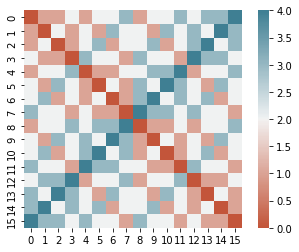

In [5]:
import seaborn as sns

sns.heatmap(
    HammingMap, 
    vmin=0, vmax=4,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

<AxesSubplot:>

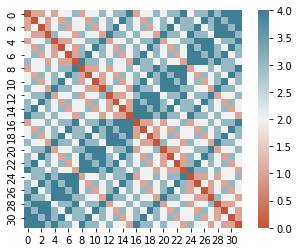

In [6]:
import seaborn as sns

sns.heatmap(
    HammingMap5, 
    vmin=0, vmax=4,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

### Data

Below is three output for 4-qubit GHZ state. 

In [7]:
data1 = np.array([1731, 44, 29, 86, 8, 9, 6, 80, 23, 2, 4, 78, 38, 82, 135, 1741])
data2 = np.array([1713, 88, 33, 54, 11, 19, 13, 74, 22, 3, 18, 77, 32, 91, 130, 1718])
data3 = np.array([8284, 155, 125, 307, 156, 73, 49, 731, 127, 38, 97, 284, 311, 444, 553, 8266])

In [8]:
# Make sure data counts are in probability
data1 = data1/sum(data1)
data2 = data1/sum(data2)
data3 = data1/sum(data3)

### Response Construction

I perform a calibration experiment with IBMq-lima, and below is the calibration matrix for 4096 shots. More precise result should consider the statistical fluctuation of individual calibration experiment.

In [9]:
# Calibration matrix
resMatrix = np.array([[3977, 23, 21, 0, 21, 0, 1, 0, 48, 0, 0, 0, 5, 0, 0, 0],
                      [119, 3861, 4, 19, 2, 28, 0, 1, 1, 55, 0, 1, 1, 4, 0, 0], 
                      [168, 2, 3803, 25, 5, 0, 38, 0, 2, 0, 49, 0, 0, 0, 4, 0], 
                      [5, 134, 133, 3750, 1, 1, 0, 21, 0, 1, 2, 43, 0, 1, 0, 4], 
                      [169, 0, 3, 0, 3834, 20, 13, 0, 7, 0, 0, 0, 49, 1, 0, 0], 
                      [6, 154, 1, 4, 153, 3723, 1, 20, 0, 5, 0, 0, 1, 26, 0, 1], 
                      [12, 0, 180, 2, 134, 3, 3710, 13, 0, 0, 2, 0, 0, 0, 39, 1], 
                      [1, 6, 5, 151, 8, 128, 142, 3609, 0, 0, 0, 8, 0, 0, 1, 37], 
                      [150, 0, 1, 0, 1, 0, 0, 0, 3877, 21, 11, 0, 33, 0, 2, 0], 
                      [7, 112, 1, 2, 0, 6, 0, 0, 117, 3806, 1, 25, 2, 17, 0, 0], 
                      [10, 0, 147, 1, 0, 0, 1, 0, 139, 2, 3746, 17, 2, 0, 31, 0], 
                      [0, 2, 9, 120, 0, 0, 0, 3, 7, 161, 140, 3635, 0, 2, 0, 17], 
                      [10, 0, 0, 0, 137, 0, 2, 0, 172, 3, 1, 1, 3726, 24, 19, 1], 
                      [0, 13, 0, 2, 6, 134, 0, 1, 6, 196, 0, 1, 138, 3585, 0, 14], 
                      [1, 0, 6, 0, 6, 0, 153, 1, 1, 0, 156, 2, 131, 0, 3612, 27], 
                      [0, 0, 0, 17, 0, 5, 4, 127, 1, 6, 7, 129, 3, 169, 105, 3523]])

# Make sure each element A_ij is in P(m = i|t = j)
resMatrix = resMatrix/4096

In [10]:
import matplotlib.pyplot as plt

tmpRes = np.copy(resMatrix)
for i, _ in enumerate(resMatrix):
    tmpRes[i][i] = 0

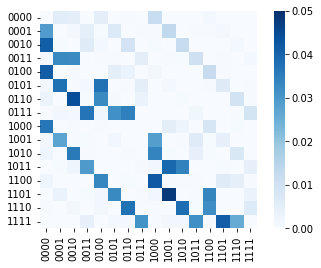

In [11]:
sns.heatmap(
    tmpRes, 
    vmin=0, vmax=0.05,
    #cmap=sns.color_palette("Blues", as_cmap=True),
    cmap = YlGnBu
    xticklabels = rowLabel,
    yticklabels = colLabel,
    square=True
)
plt.savefig('response.pdf')

In [12]:
import scipy.linalg as la

def pseudoInverse(initialA, rawData):
    """
    Following IBM Qiskit, we define a function to compute the 
    (Moore-Penrose) pseudo-inverse of a matrix as calibration.
    """
    calMatrix = la.pinv(initialA)
    return np.dot(calMatrix, initialA)

In [13]:
from scipy.optimize import minimize
def leastQ(initialA, rawData):
    """
    Following IBM Qiskit, we define a function to compute the calibration
    by minimizing ||Lambda * Count_est - Count_exp||_2. Make sure input 
    parameters should be probability
    
    Use function in this way: 
    leastQ(resMatrix/size, data/sum(data))
    """
    # Make sure the element of A is probability 
    #if np.sum(initialA) > 1:
    #    for i, _ in enumerate(initialA):
    #        initialA[i] = initialA[i]/np.sum(initialA[i])
    
    # Make sure the element of data is probability 
    #if np.sum(rawData) > 1:
    #    rawData = rawData/np.sum(rawData)
    
    realData = np.copy(rawData) # Deep copy
    
    # Define the function need to be minimized, x is the estimated true value
    def fun(x):
        return sum((rawData - np.dot(initialA, x))**2)
    
    x0 = np.random.rand(len(rawData)) # Generate random initial fitting value
    x0 = x0 / sum(x0) # Normalized the initial value
    
    cons = ({'type': 'eq', 'fun': lambda x: sum(x) - 1}) # Make sure the sum of probability is 
    bnds = tuple((0, 1) for x in x0) # Make sure probability is between 0 and 1
    mitigation = minimize(fun, x0, method='SLSQP', constraints=cons, bounds=bnds, tol=1e-6)
    
    return mitigation.x

In [14]:
def IBU(initialA, rawData, nIter):
    """
    Following public code of nature paper, we define a function to compute the calibration
    by iterative Bayesian unfolding method. Make sure input parameters should be probability
    
    Use function in this way: 
    IBU(resMatrix/4096, data1/sum(data1),10)
    """
    dataLen = len(rawData)
    t0 = np.ones(dataLen)
    tn = t0
    
    for k in range(nIter):
        # for k-th iteration time
        tmp = np.ones(dataLen) # define the t_n+1 null array
        
        # for each element in the array
        for i in range(dataLen): 
            jSum = 0 # initial the sum
            for j in range(dataLen):
                tmpSum = np.dot(initialA[j], tn) # Get sum of R_jk*t_k^n as inner product
                jSum += initialA[j][i] * tn[i] * rawData[j] / tmpSum # sum up R_ji * t_i^n * m_j for j 
            
            tmp[i] = np.copy(jSum)

        tn = np.copy(tmp) # return the result after k-th iteration 
    return tn

In [15]:
Gamma = np.array([[9.92520864e-01, 1.24239043e-02, 1.07439364e-02, 1.34487487e-04,
        6.26478454e-03, 7.84195941e-05, 6.78156490e-05, 8.48884050e-07,
        6.26478454e-03, 7.84195941e-05, 6.78156490e-05, 8.48884050e-07,
        3.95432748e-05, 4.94983913e-07, 4.28051887e-07, 5.35815000e-09],
       [1.39147728e-03, 9.81488437e-01, 1.50625986e-05, 1.06245115e-02,
        8.78299454e-06, 6.19514794e-03, 9.50750136e-08, 6.70618400e-05,
        8.78299454e-06, 6.19514794e-03, 9.50750136e-08, 6.70618400e-05,
        5.54381982e-08, 3.91037291e-05, 6.00112800e-10, 4.23293850e-07],
       [2.28806053e-03, 2.86408538e-05, 9.84064989e-01, 1.23180576e-02,
        1.44422215e-05, 1.80780863e-07, 6.21141111e-03, 7.77514910e-05,
        1.44422215e-05, 1.80780863e-07, 6.21141111e-03, 7.77514910e-05,
        9.11591982e-08, 1.14108750e-09, 3.92063821e-05, 4.90766850e-07],
       [3.20777562e-06, 2.26262745e-03, 1.37962246e-03, 9.73126553e-01,
        2.02474566e-08, 1.42816881e-05, 8.70816699e-06, 6.14236779e-03,
        2.02474566e-08, 1.42816881e-05, 8.70816699e-06, 6.14236779e-03,
        1.27801800e-10, 9.01459125e-08, 5.49658872e-08, 3.87705811e-05],
       [1.88937946e-03, 2.36503538e-05, 2.04523386e-05, 2.56012650e-07,
        9.88145459e-01, 1.23691350e-02, 1.06965731e-02, 1.33894616e-04,
        1.19257495e-05, 1.49280863e-07, 1.29095014e-07, 1.61595000e-09,
        6.23716701e-03, 7.80738911e-05, 6.75166921e-05, 8.45141850e-07],
       [2.64883962e-06, 1.86837795e-03, 2.86734168e-08, 2.02249994e-05,
        1.38534312e-03, 9.77161667e-01, 1.49961970e-05, 1.05776747e-02,
        1.67194566e-08, 1.17931881e-05, 1.80986400e-10, 1.27660050e-07,
        8.74427580e-06, 6.16783740e-03, 9.46558872e-08, 6.67662062e-05],
       [4.35559062e-06, 5.45212125e-08, 1.87328272e-03, 2.34488624e-05,
        2.27797390e-03, 2.85145941e-05, 9.79726860e-01, 1.22637550e-02,
        2.74924566e-08, 3.44137500e-10, 1.18241470e-05, 1.48009050e-07,
        1.43785548e-05, 1.79983913e-07, 6.18402887e-03, 7.74087332e-05],
       [6.10637580e-09, 4.30717579e-06, 2.62627258e-06, 1.85246013e-03,
        3.19363454e-06, 2.25265294e-03, 1.37354056e-03, 9.68836646e-01,
        3.85434000e-11, 2.71868625e-08, 1.65770136e-08, 1.16927150e-05,
        2.01581982e-08, 1.42187291e-05, 8.66977811e-06, 6.11528992e-03],
       [1.88937946e-03, 2.36503538e-05, 2.04523386e-05, 2.56012650e-07,
        1.19257495e-05, 1.49280863e-07, 1.29095014e-07, 1.61595000e-09,
        9.88145459e-01, 1.23691350e-02, 1.06965731e-02, 1.33894616e-04,
        6.23716701e-03, 7.80738911e-05, 6.75166921e-05, 8.45141850e-07],
       [2.64883962e-06, 1.86837795e-03, 2.86734168e-08, 2.02249994e-05,
        1.67194566e-08, 1.17931881e-05, 1.80986400e-10, 1.27660050e-07,
        1.38534312e-03, 9.77161667e-01, 1.49961970e-05, 1.05776747e-02,
        8.74427580e-06, 6.16783740e-03, 9.46558872e-08, 6.67662062e-05],
       [4.35559062e-06, 5.45212125e-08, 1.87328272e-03, 2.34488624e-05,
        2.74924566e-08, 3.44137500e-10, 1.18241470e-05, 1.48009050e-07,
        2.27797390e-03, 2.85145941e-05, 9.79726860e-01, 1.22637550e-02,
        1.43785548e-05, 1.79983913e-07, 6.18402887e-03, 7.74087332e-05],
       [6.10637580e-09, 4.30717579e-06, 2.62627258e-06, 1.85246013e-03,
        3.85434000e-11, 2.71868625e-08, 1.65770136e-08, 1.16927150e-05,
        3.19363454e-06, 2.25265294e-03, 1.37354056e-03, 9.68836646e-01,
        2.01581982e-08, 1.42187291e-05, 8.66977811e-06, 6.11528992e-03],
       [3.59665462e-06, 4.50212125e-08, 3.89334168e-08, 4.87350000e-10,
        1.88105037e-03, 2.35460941e-05, 2.03621770e-05, 2.54884050e-07,
        1.88105037e-03, 2.35460941e-05, 2.03621770e-05, 2.54884050e-07,
        9.83789343e-01, 1.23146072e-02, 1.06494186e-02, 1.33304358e-04],
       [5.04237580e-09, 3.55667579e-06, 5.45832000e-11, 3.85006500e-08,
        2.63716254e-06, 1.86014144e-03, 2.85470136e-08, 2.01358400e-05,
        2.63716254e-06, 1.86014144e-03, 2.85470136e-08, 2.01358400e-05,
        1.37923601e-03, 9.72853971e-01, 1.49300881e-05, 1.05310443e-02],
       [8.29137580e-09, 1.03787500e-10, 3.56601258e-06, 4.46376500e-08,
        4.33638954e-06, 5.42808625e-08, 1.86502458e-03, 2.33454910e-05,
        4.33638954e-06, 5.42808625e-08, 1.86502458e-03, 2.33454910e-05,
        2.26793173e-03, 2.83888911e-05, 9.75407856e-01, 1.22096918e-02],
       [1.16242000e-11, 8.19921250e-09, 4.99941680e-09, 3.52637435e-06,
        6.07945660e-09, 4.28818814e-06, 2.61469499e-06, 1.84429379e-03,
        6.07945660e-09, 4.28818814e-06, 2.61469499e-06, 1.84429379e-03,
        3.17955580e-06, 2.24272240e-03, 1.36748548e-03, 9.64565650e-01]])

### Scalable Response

In [16]:
HammingMap1 = np.copy(HammingMap)
for i in range(0,16):
    for j in range(0,16):
        if HammingMap1[i][j] > 1:
            HammingMap1[i][j] = 0
        else: 
            HammingMap1[i][j] = 1

In [17]:
resMatrix1 = HammingMap1 * resMatrix
resMatrix1

array([[0.97094727, 0.00561523, 0.00512695, 0.        , 0.00512695,
        0.        , 0.        , 0.        , 0.01171875, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.02905273, 0.94262695, 0.        , 0.00463867, 0.        ,
        0.00683594, 0.        , 0.        , 0.        , 0.01342773,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.04101562, 0.        , 0.9284668 , 0.00610352, 0.        ,
        0.        , 0.00927734, 0.        , 0.        , 0.        ,
        0.01196289, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.03271484, 0.0324707 , 0.91552734, 0.        ,
        0.        , 0.        , 0.00512695, 0.        , 0.        ,
        0.        , 0.01049805, 0.        , 0.        , 0.        ,
        0.        ],
       [0.04125977, 0.        , 0.        , 0.        , 0.93603516,
        0.00488281, 0.00317383, 

In [18]:
Gamma1 = HammingMap1 * Gamma
Gamma1

array([[0.99252086, 0.0124239 , 0.01074394, 0.        , 0.00626478,
        0.        , 0.        , 0.        , 0.00626478, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00139148, 0.98148844, 0.        , 0.01062451, 0.        ,
        0.00619515, 0.        , 0.        , 0.        , 0.00619515,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00228806, 0.        , 0.98406499, 0.01231806, 0.        ,
        0.        , 0.00621141, 0.        , 0.        , 0.        ,
        0.00621141, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.00226263, 0.00137962, 0.97312655, 0.        ,
        0.        , 0.        , 0.00614237, 0.        , 0.        ,
        0.        , 0.00614237, 0.        , 0.        , 0.        ,
        0.        ],
       [0.00188938, 0.        , 0.        , 0.        , 0.98814546,
        0.01236913, 0.01069657, 

In [19]:
for i in range(16):
    resMatrix1[i] = resMatrix1[i]/np.sum(resMatrix1[i])

In [20]:
for i in range(16):
    Gamma1[i] = Gamma1[i]/np.sum(Gamma1[i])

In [21]:
res1 = IBU(resMatrix, data1, 10)
res2 = IBU(resMatrix1, data1, 10)
res3 = IBU(Gamma, data1, 10)
res4 = IBU(Gamma1, data1, 10)

In [29]:
res1

array([4.51958267e-01, 6.35873110e-04, 4.17114324e-06, 2.15347209e-02,
       1.86577437e-09, 1.25450764e-03, 7.23224969e-05, 1.49751065e-02,
       2.00934944e-06, 2.16876078e-06, 2.08184890e-05, 1.73937399e-02,
       8.44263938e-03, 1.92698836e-02, 3.08959983e-02, 4.33537772e-01])

In [22]:
ideal = np.array([0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5])

In [34]:
d1 = np.sum(np.absolute(ideal-res1))/2
d2 = np.sum(np.absolute(ideal-res2))/2
d3 = np.sum(np.absolute(ideal-res3))/2
d4 = np.sum(np.absolute(ideal-res4))/2

In [35]:
d1

0.11450396143090663

In [36]:
d2

0.11996597902528781

In [37]:
d3

0.13391771686323956

In [38]:
d4

0.13413024190727163